In [1]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/sabah0312/ml-datasets/refs/heads/main/xor'
df = pd.read_csv(url, sep=",")

df

,x1,x2,class label
0,0.781306,1.062984,0
1,-1.060524,-1.095550,0
2,0.632125,0.674028,0
3,-1.424712,0.535203,1
4,1.383161,1.368510,0
...,...,...,...
745,0.792484,0.839275,0
746,0.582466,-0.749250,1
747,-1.593475,0.671721,1
748,-0.812671,-0.268542,0


## Visualize

In [2]:
X = df[['x1','x2']].values
y = df['class label'].values

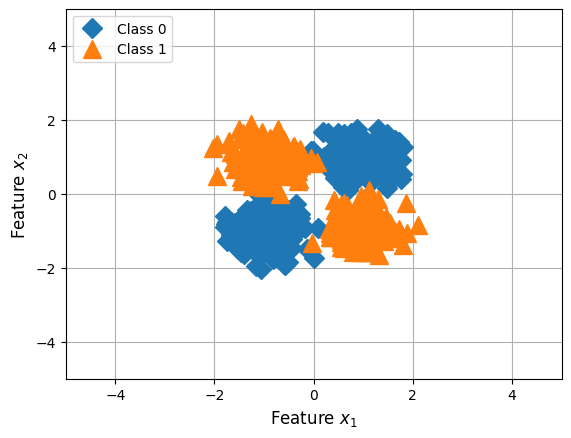

In [3]:
import matplotlib.pyplot as plt
plt.plot(
    X[y == 0, 0],
    X[y == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X[y == 1, 0],
    X[y == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [4]:
import torch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

In [5]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, num_features, learning_rate = 0.1):
    super().__init__()
    self.linear = torch.nn.Linear(num_features, 1)
    self.learning_rate = learning_rate
    self.optimizer = torch.optim.SGD(self.linear.parameters(), lr = learning_rate)
    self.loss_fn = torch.nn.BCEWithLogitsLoss()

  def forward(self, x):
    return self.linear(x)

  def predict(self,x):
    with torch.no_grad():
      z = self.forward(x)
      probability = torch.sigmoid(z)
      return probability > 0.5

  def update(self, x, y_true):
    predictions = self.forward(x)

    loss = self.loss_fn(predictions, y_true)

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()
    return loss.item()

In [6]:
LC = LinearClassifier(num_features=2)

print(f"initial weights: {LC.linear.weight}")
print(f"initial bias : {LC.linear.bias}")
epoch_no = 100
for epoch in range(epoch_no):
  loss = LC.update(X, y)
  if epoch%10 == 0:
    print(f"epoch: {epoch}/ {epoch_no}, loss: {loss}")
print(f" weights: {LC.linear.weight}")
print(f" bias : {LC.linear.bias}")

initial weights: Parameter containing:
tensor([[-0.5616,  0.2284]], requires_grad=True)
initial bias : Parameter containing:
tensor([-0.1952], requires_grad=True)
epoch: 0/ 100, loss: 0.7486116290092468
epoch: 10/ 100, loss: 0.7277811169624329
epoch: 20/ 100, loss: 0.7144128680229187
epoch: 30/ 100, loss: 0.7060186266899109
epoch: 40/ 100, loss: 0.700823187828064
epoch: 50/ 100, loss: 0.6976364850997925
epoch: 60/ 100, loss: 0.6956925988197327
epoch: 70/ 100, loss: 0.6945106387138367
epoch: 80/ 100, loss: 0.6937932372093201
epoch: 90/ 100, loss: 0.6933582425117493
 weights: Parameter containing:
tensor([[0.0065, 0.0359]], requires_grad=True)
 bias : Parameter containing:
tensor([-0.0211], requires_grad=True)


## Multi-Layer Perceptron


In [9]:
class MLP(torch.nn.Module):
  def __init__(self, num_features, learning_rate = .7):
    super().__init__()
    self.layers = torch.nn.Sequential(

        #1st hidden layer
        torch.nn.Linear(num_features, 2),
        torch.nn.ReLU(),

        torch.nn.Linear(2, 1)
    )
    self.learning_rate = learning_rate
    self.optimizer = torch.optim.SGD(self.layers.parameters(), lr = learning_rate)
    self.loss_fn = torch.nn.BCEWithLogitsLoss()

  def forward(self, x):
    return self.layers(x)

  def predict(self,x):
    with torch.no_grad():
      z = self.forward(x)
      probability = torch.sigmoid(z)
      return probability > 0.5

  def update(self, x, y_true):
    predictions = self.forward(x)

    loss = self.loss_fn(predictions, y_true)

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()
    return loss.item()

In [10]:
mlp = MLP(num_features=2)

# print(f"initial weights: {mlp.we.linear.weight}")
# print(f"initial bias : {LC.linear.bias}")
epoch_no = 1000
for epoch in range(epoch_no):
  loss = mlp.update(X, y)
  if epoch%10 == 0:
    print(f"epoch: {epoch}/ {epoch_no}, loss: {loss}")
# print(f" weights: {mlp.all_layers.}")
# print(f" bias : {LC.linear.bias}")

epoch: 0/ 1000, loss: 0.699567437171936
epoch: 10/ 1000, loss: 0.6532800197601318
epoch: 20/ 1000, loss: 0.5065639019012451
epoch: 30/ 1000, loss: 0.37264981865882874
epoch: 40/ 1000, loss: 0.28788164258003235
epoch: 50/ 1000, loss: 0.23763519525527954
epoch: 60/ 1000, loss: 0.20658719539642334
epoch: 70/ 1000, loss: 0.18631508946418762
epoch: 80/ 1000, loss: 0.1725170761346817
epoch: 90/ 1000, loss: 0.16269102692604065
epoch: 100/ 1000, loss: 0.15546470880508423
epoch: 110/ 1000, loss: 0.14999616146087646
epoch: 120/ 1000, loss: 0.14577314257621765
epoch: 130/ 1000, loss: 0.14245086908340454
epoch: 140/ 1000, loss: 0.13980112969875336
epoch: 150/ 1000, loss: 0.13766075670719147
epoch: 160/ 1000, loss: 0.1359076350927353
epoch: 170/ 1000, loss: 0.1344558447599411
epoch: 180/ 1000, loss: 0.1332434117794037
epoch: 190/ 1000, loss: 0.13222168385982513
epoch: 200/ 1000, loss: 0.13135427236557007
epoch: 210/ 1000, loss: 0.13061335682868958
epoch: 220/ 1000, loss: 0.12997648119926453
epoch: 

In [11]:
for name, param in mlp.layers[0].named_parameters():
    print(name, param.shape)
    print(param)

weight torch.Size([2, 2])
Parameter containing:
tensor([[-2.3658,  2.3054],
        [ 2.2258, -2.0596]], requires_grad=True)
bias torch.Size([2])
Parameter containing:
tensor([-0.8914, -0.5679], requires_grad=True)


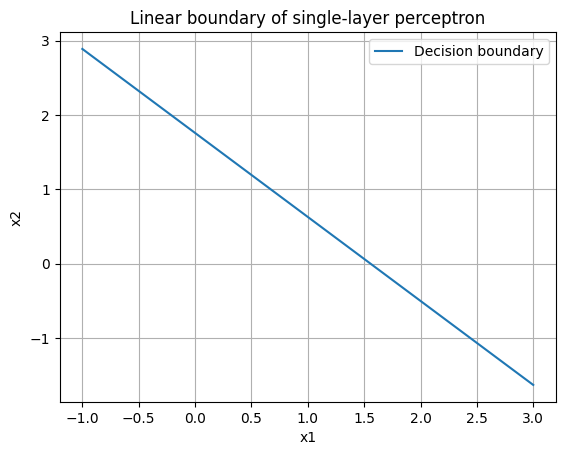

In [12]:
w1, w2, b = 3.3840, 2.9929, -5.2649

x1 = np.linspace(-1, 3, 100)
x2 = -(w1/w2)*x1 - b/w2

plt.plot(x1, x2, label='Decision boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Linear boundary of single-layer perceptron')
plt.grid(True)
plt.legend()
plt.show()

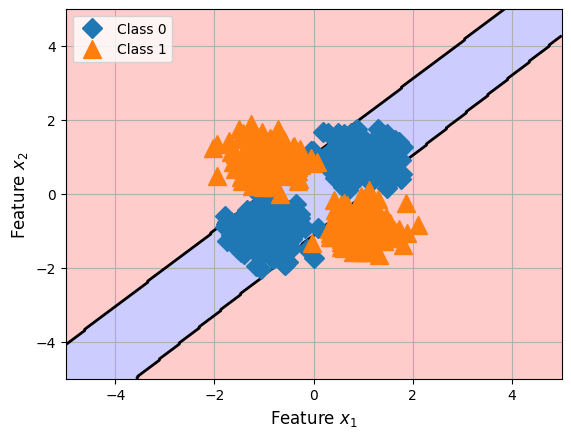

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid
xx1, xx2 = np.meshgrid(
    np.linspace(-5, 5, 300),
    np.linspace(-5, 5, 300)
)

# Convert to tensor
grid = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)

# If you normalized your data, normalize the grid too
if 'X_normalized' in locals():
    grid = (grid - X_mean) / X_std

# Get predictions
with torch.no_grad():
    Z = mlp.predict(grid)
    Z = Z.reshape(xx1.shape).numpy()

# Plot decision regions
plt.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])

# Plot decision boundary
plt.contour(xx1, xx2, Z, levels=[0.5], colors='black', linewidths=2)

# Your original plot
plt.plot(
    X[y.squeeze() == 0, 0],
    X[y.squeeze() == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)
plt.plot(
    X[y.squeeze() == 1, 0],
    X[y.squeeze() == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)
plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()